# 8. Deep Learning. PyTorch

In [1]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 13.26 MiB/s, done.
Resolving deltas: 100% (10/10), done.


## 1. Introduction to PyTorch

PyTorch is a popular open-source deep learning framework developed by Facebook's AI Research lab. It provides:
- Dynamic computation graphs (define-by-run)
- Pythonic API
- Strong GPU acceleration
- Rich ecosystem of tools and libraries

Key Differences from TensorFlow/Keras:

| TensorFlow/Keras | PyTorch |
|------------------|---------|
| `model.fit()` | Manual training loop |
| `ImageDataGenerator` | `Dataset` + `DataLoader` + `transforms` |
| `keras.layers.Dense()` | `nn.Linear()` |
| `keras.Model` | `nn.Module` |
| `.h5` or `.keras` files | `.pth` or `.pt` files |

In [2]:
import torch
from PIL import Image
import numpy as np

## 2. PyTorch and Image Loading

PyTorch is a popular open-source deep learning framework developed by Facebook's AI Research lab.

Key differences from TensorFlow/Keras:
- Dynamic computation graphs (define-by-run)
- More Pythonic and flexible
- Manual training loops instead of `model.fit()`
- Explicit device management (CPU/GPU)

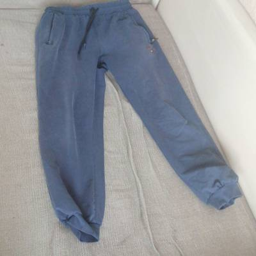

In [5]:
img = Image.open('clothing-dataset-small/train/pants/0098b991-e36e-4ef1-b5ee-4154b21e2a92.jpg')
img.resize((256, 256))

In [6]:
X = np.array(img.resize((224, 224)))
X

array([[[179, 181, 176],
        [179, 181, 176],
        [179, 181, 176],
        ...,
        [237, 230, 222],
        [238, 231, 223],
        [236, 229, 221]],

       [[180, 181, 176],
        [177, 178, 173],
        [177, 178, 173],
        ...,
        [237, 230, 222],
        [237, 230, 222],
        [235, 228, 220]],

       [[178, 179, 174],
        [175, 176, 171],
        [175, 176, 171],
        ...,
        [237, 230, 222],
        [237, 230, 222],
        [234, 227, 219]],

       ...,

       [[155, 149, 137],
        [155, 149, 137],
        [158, 152, 140],
        ...,
        [157, 149, 138],
        [159, 151, 140],
        [156, 148, 137]],

       [[151, 145, 133],
        [152, 146, 134],
        [157, 151, 139],
        ...,
        [155, 147, 136],
        [157, 149, 138],
        [155, 147, 136]],

       [[150, 144, 132],
        [152, 146, 134],
        [157, 151, 139],
        ...,
        [154, 146, 135],
        [155, 147, 136],
        [153, 145, 134]]

## 3. Pre-trained Models

Instead of training from scratch, we'll use a model pre-trained on ImageNet (1.4M images, 1000 classes).

Why use pre-trained models?

- Already learned to recognize edges, textures, shapes
- Saves training time
- Works well even with small datasets
- Better performance than training from scratch

### Using MobileNetV2

We'll use MobileNetV2 (in the original tutorial we used Xception):

In [7]:
import torchvision.models as models
from torchvision import transforms

In [ ]:
model = models.mobilenet_v2(weights='IMAGENET1K_V1')
model.eval()

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /Users/vadim.sokoltsov/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 22.7MB/s]


In [9]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [13]:
x = preprocess(img)
batch_t = torch.unsqueeze(x, 0)

with torch.no_grad():
    output = model(batch_t)

_, indices = torch.sort(output, descending=True)

In [1]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt -O imagenet_classes.txt

--2025-12-06 19:22:25--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 240.3.3.99
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|240.3.3.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2025-12-06 19:22:25 (23.4 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [17]:
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

# Get top 5 predictions
top5_indices = indices[0, :5].tolist()
top5_classes = [categories[i] for i in top5_indices]

print("Top 5 predictions:")
for i, class_name in enumerate(top5_classes):
    print(f"{i+1}: {class_name}")

Top 5 predictions:
1: jean
2: suit
3: cardigan
4: sweatshirt
5: overskirt


Key concepts:
- Input size: MobileNetV2 expects 224×224 images (Xception uses 299×299)
- Normalization: Images scaled with ImageNet mean and std
- Batch size: Number of images processed together
- Batch dimension: Shape (batch_size, channels, height, width) - e.g., (1, 3, 224, 224)

## 4. Convolutional Neural Networks

Convolutional Neural Networks (CNNs) are specialized neural networks for processing grid-like data such as images.

Key Components:

1. Convolutional Layer: Extracts features using filters
   - Applies filters (e.g., 3×3, 5×5) to detect patterns
   - Creates feature maps (one per filter)
   - Detects edges, textures, shapes

2. ReLU Activation: Introduces non-linearity
   - `f(x) = max(0, x)`
   - Sets negative values to 0
   - Helps network learn complex patterns

3. Pooling Layer: Down-samples feature maps
   - Reduces spatial dimensions
   - Max pooling: takes maximum value in a region
   - Makes features more robust to small translations

4. Fully Connected (Dense) Layer: Final classification
   - Flattens 2D feature maps to 1D vector
   - Connects to output classes

CNN Workflow:
```
Input Image → Conv + ReLU → Pooling → Conv + ReLU → Pooling → Flatten → Dense → Output
```

## 5. Transfer Learning

Transfer Learning reuses a model trained on one task (ImageNet) for a different task (clothing classification).

Approach:

1. Load pre-trained model (feature extractor)
2. Remove original classification head
3. Freeze convolutional layers
4. Add custom layers for our task
5. Train only the new layers

### Custom Dataset Class

First, create a PyTorch `Dataset` to load images:

In [18]:
import os
from torch.utils.data import Dataset

class ClothingDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.classes = sorted(os.listdir(data_dir))
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}

        for label_name in self.classes:
            label_dir = os.path.join(data_dir, label_name)
            for img_name in os.listdir(label_dir):
                self.image_paths.append(os.path.join(label_dir, img_name))
                self.labels.append(self.class_to_idx[label_name])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

### Simple Preprocessing

In [19]:
input_size = 224

# ImageNet normalization values
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Simple transforms - just resize and normalize
train_transforms = transforms.Compose([
    transforms.RandomRotation(10),           # Rotate up to 10 degrees
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),  # Zoom
    transforms.RandomHorizontalFlip(),       # Horizontal flip
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

val_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

### Create DataLoaders

In [20]:
from torch.utils.data import DataLoader

train_dataset = ClothingDataset(
    data_dir='./clothing-dataset-small/train',
    transform=train_transforms
)

val_dataset = ClothingDataset(
    data_dir='./clothing-dataset-small/validation',
    transform=val_transforms
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

### Build the Model

In [ ]:
import torch.nn as nn

class ClothingClassifierMobileNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ClothingClassifierMobileNet, self).__init__()

        # Load pre-trained MobileNetV2
        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')

        # Freeze base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False

        # Remove original classifier
        self.base_model.classifier = nn.Identity()

        # Add custom layers
        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))
        self.output_layer = nn.Linear(1280, num_classes)
        self.pool = nn.MaxPool2d()

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.output_layer(x)
        return x

### Train the Model

In [28]:
import torch.optim as optim

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f"Using device: MPS (Apple Silicon GPU)")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using device: CUDA (NVIDIA GPU)")
else:
    device = torch.device("cpu")
    print(f"Using device: CPU")

model = ClothingClassifierMobileNet(num_classes=10)
model.to(device);

Using device: MPS (Apple Silicon GPU)


In [25]:
model.forward(torch.rand(1, 3, 224, 224).to(device))

tensor([[ 0.1114,  0.1663,  0.4445, -0.2907,  0.1682, -0.5752, -0.1405, -0.1930,
          0.0290, -0.7309]], grad_fn=<AddmmBackward0>)

In [23]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

Now train it:

In [29]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Iterate over the training data
    for inputs, labels in train_loader:
        # Move data to the specified device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients to prevent accumulation
        optimizer.zero_grad()
        # Forward pass
        outputs = model(inputs)
        # Calculate the loss
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Accumulate training loss
        running_loss += loss.item()
        # Get predictions
        _, predicted = torch.max(outputs.data, 1)
        # Update total and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    # Disable gradient calculation for validation
    with torch.no_grad():
        # Iterate over the validation data
        for inputs, labels in val_loader:
            # Move data to the specified device (GPU or CPU)
            inputs, labels = inputs.to(device), labels.to(device)
            # Forward pass
            outputs = model(inputs)
            # Calculate the loss
            loss = criterion(outputs, labels)

            # Accumulate validation loss
            val_loss += loss.item()
            # Get predictions
            _, predicted = torch.max(outputs.data, 1)
            # Update total and correct predictions
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    # Calculate average validation loss and accuracy
    val_loss /= len(val_loader)
    val_acc = val_correct / val_total

    # Print epoch results
    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

Epoch 1/10
  Train Loss: 2.4855, Train Acc: 0.0763
  Val Loss: 2.4901, Val Acc: 0.0792
Epoch 2/10
  Train Loss: 2.4829, Train Acc: 0.0737
  Val Loss: 2.5023, Val Acc: 0.0792
Epoch 3/10
  Train Loss: 2.4858, Train Acc: 0.0772
  Val Loss: 2.4932, Val Acc: 0.0792
Epoch 4/10
  Train Loss: 2.4875, Train Acc: 0.0818
  Val Loss: 2.4923, Val Acc: 0.0821
Epoch 5/10
  Train Loss: 2.4831, Train Acc: 0.0746
  Val Loss: 2.4922, Val Acc: 0.0792
Epoch 6/10
  Train Loss: 2.4832, Train Acc: 0.0750
  Val Loss: 2.4883, Val Acc: 0.0821
Epoch 7/10
  Train Loss: 2.4854, Train Acc: 0.0743
  Val Loss: 2.4932, Val Acc: 0.0821
Epoch 8/10
  Train Loss: 2.4809, Train Acc: 0.0746
  Val Loss: 2.4935, Val Acc: 0.0792
Epoch 9/10
  Train Loss: 2.4848, Train Acc: 0.0743
  Val Loss: 2.4948, Val Acc: 0.0792
Epoch 10/10
  Train Loss: 2.4850, Train Acc: 0.0766
  Val Loss: 2.4928, Val Acc: 0.0792


It's a lower-level framework, that's why we need to implement some of these things like calculating accuracy on validation.

The line `optimizer.zero_grad()` is crucial in the training loop.

In PyTorch, gradients are accumulated by default. This means that if you don't zero the gradients before calculating the gradients for the current batch, the gradients from the previous batch will be added to the gradients of the current batch. This would lead to incorrect updates to your model's parameters.

By calling `optimizer.zero_grad()`, you clear out the old gradients, ensuring that the gradients calculated during the `loss.backward()` call are only based on the current batch of data. This is essential for the optimizer to take the correct step during `optimizer.step()`.

`model.train()` and `model.eval()` are needed to manage the behavior of certain layers during training and evaluation.

`model.train()` sets the model to training mode. In training mode, layers like Dropout and BatchNorm behave differently. Dropout layers are active (randomly dropping neurons), and BatchNorm layers update their running statistics (mean and variance) based on the current batch.

`model.eval()` sets the model to evaluation mode. In evaluation mode, Dropout layers are inactive (they pass through all neurons), and BatchNorm layers use their accumulated running statistics instead of the current batch statistics. This ensures consistent behavior during inference and prevents randomness from affecting the evaluation results.


Let's put it inside a function so it's easier for us to call it:

In [30]:
def train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device):
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = val_correct / val_total

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

## 6. Tuning the Learning Rate

The learning rate controls how much to update model weights during training. It's one of the most important hyperparameters.

Analogy: Reading speed
- Too fast: Skip details, poor understanding (may not converge)
- Too slow: Never finish the book (training takes too long)
- Just right: Good comprehension and efficiency

Experimentation approach:

1. Try multiple values: `[0.0001, 0.001, 0.01, 0.1]`
2. Train for a few epochs each
3. Compare validation accuracy
4. Choose the rate with best performance and smallest train/val gap

In [31]:
def make_model(learning_rate=0.01):
    model = ClothingClassifierMobileNet(num_classes=10)
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

Let's test different learning rates:

In [32]:
for lr in [0.001, 0.1]: #0.01, 0.1]:
    print("learning rate =", lr)
    model, optimizer = make_model(lr)
    train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)

learning rate = 0.001
Epoch 1/10
  Train Loss: 1.3967, Train Acc: 0.5577
  Val Loss: 0.8619, Val Acc: 0.7331
Epoch 2/10
  Train Loss: 0.8548, Train Acc: 0.7353
  Val Loss: 0.7422, Val Acc: 0.7683
Epoch 3/10
  Train Loss: 0.6788, Train Acc: 0.7894
  Val Loss: 0.6855, Val Acc: 0.7801
Epoch 4/10
  Train Loss: 0.6142, Train Acc: 0.8110
  Val Loss: 0.6308, Val Acc: 0.7889
Epoch 5/10
  Train Loss: 0.5732, Train Acc: 0.8110
  Val Loss: 0.6462, Val Acc: 0.7830
Epoch 6/10
  Train Loss: 0.5489, Train Acc: 0.8253
  Val Loss: 0.5980, Val Acc: 0.7947
Epoch 7/10
  Train Loss: 0.5056, Train Acc: 0.8354
  Val Loss: 0.5982, Val Acc: 0.8065
Epoch 8/10
  Train Loss: 0.4868, Train Acc: 0.8465
  Val Loss: 0.6126, Val Acc: 0.7771
Epoch 9/10
  Train Loss: 0.4800, Train Acc: 0.8377
  Val Loss: 0.6002, Val Acc: 0.8152
Epoch 10/10
  Train Loss: 0.4614, Train Acc: 0.8491
  Val Loss: 0.6496, Val Acc: 0.7977
learning rate = 0.1
Epoch 1/10
  Train Loss: 21.3585, Train Acc: 0.5215
  Val Loss: 5.3853, Val Acc: 0.7038

The best learning rate is 0.001 (accuracy 0.815).

## 7. Model Checkpointing

Checkpointing saves the model during training to:
- Keep the best performing model
- Resume training if interrupted
- Avoid losing progress

Update the train function:

In [35]:
def train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device):
    best_val_accuracy = 0.0  # Initialize variable to track the best validation accuracy


    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = val_correct / val_total

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        if val_acc > best_val_accuracy:
            best_val_accuracy = val_acc
            checkpoint_path = f'clothing_v4_{epoch+1:02d}_{val_acc:.3f}.pth'
            torch.save(model.state_dict(), checkpoint_path)
            print(f'Checkpoint saved: {checkpoint_path}')

In [36]:
import torch.nn as nn

class ClothingClassifierMobileNet(nn.Module):
    def __init__(self, size_inner=100, droprate=0.2, num_classes=10):
        super(ClothingClassifierMobileNet, self).__init__()

        # Load pre-trained MobileNetV2
        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')

        # Freeze base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False

        # Remove original classifier
        self.base_model.classifier = nn.Identity()

        # Add custom layers
        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))

        self.inner = nn.Linear(1280, size_inner)  # New inner layer
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(droprate)  # Add dropout
        self.output_layer = nn.Linear(size_inner, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.inner(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.output_layer(x)
        return x

Update make_model:

In [37]:
def make_model(
        learning_rate=0.01,
        size_inner=100,
        droprate=0.2,
):
    model = ClothingClassifierMobileNet(
        num_classes=10,
        size_inner=size_inner,
        droprate=droprate,
    )
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

Experiment with different sizes:
- Try: `size_inner = [10, 100, 1000]`
- Larger layers: more capacity, may overfit
- Smaller layers: faster, may underfit

Key points:
- Inner layer uses ReLU activation
- Output layer has no activation (logits)
- `CrossEntropyLoss` applies softmax internally

In [39]:
num_epochs = 10

model, optimizer = make_model(
    learning_rate=0.001,
    size_inner=100,
    droprate=0.2,
)

train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)

Epoch 1/10
  Train Loss: 1.4943, Train Acc: 0.5016
  Val Loss: 0.9841, Val Acc: 0.7009
Checkpoint saved: clothing_v4_01_0.701.pth
Epoch 2/10
  Train Loss: 0.9510, Train Acc: 0.6926
  Val Loss: 0.7671, Val Acc: 0.7654
Checkpoint saved: clothing_v4_02_0.765.pth
Epoch 3/10
  Train Loss: 0.8001, Train Acc: 0.7168
  Val Loss: 0.7628, Val Acc: 0.7537
Epoch 4/10
  Train Loss: 0.7267, Train Acc: 0.7487
  Val Loss: 0.5945, Val Acc: 0.8006
Checkpoint saved: clothing_v4_04_0.801.pth
Epoch 5/10
  Train Loss: 0.6520, Train Acc: 0.7806
  Val Loss: 0.6166, Val Acc: 0.8006
Epoch 6/10
  Train Loss: 0.5893, Train Acc: 0.8002
  Val Loss: 0.5950, Val Acc: 0.7742
Epoch 7/10
  Train Loss: 0.5936, Train Acc: 0.7966
  Val Loss: 0.6609, Val Acc: 0.7801
Epoch 8/10
  Train Loss: 0.5784, Train Acc: 0.8002
  Val Loss: 0.6147, Val Acc: 0.7977
Epoch 9/10
  Train Loss: 0.5477, Train Acc: 0.8123
  Val Loss: 0.5499, Val Acc: 0.8328
Checkpoint saved: clothing_v4_09_0.833.pth
Epoch 10/10
  Train Loss: 0.5148, Train Acc: 

## 9. Dropout Regularization

Dropout randomly drops neurons during training to prevent overfitting.

How it works:
- Training: randomly set fraction of activations to 0
- Inference: use all neurons (dropout disabled automatically)
- Creates ensemble effect

Benefits:
- Prevents relying on specific features
- Forces learning robust patterns
- Reduces overfitting

In [ ]:
from torchsummary import summary

model_cpu = model.cpu()
summary(model_cpu, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

The output from `torchsummary` provides a detailed look at the layers in your `ClothingClassifierMobileNet` model:

*   **Layer (type)**: This column lists the type of each layer in the network (e.g., Conv2d, BatchNorm2d, ReLU6, InvertedResidual, Linear, AdaptiveAvgPool2d, Dropout).
*   **Output Shape**: This shows the shape of the tensor that is output by each layer. The first dimension `[-1]` represents the batch size, which is variable. For convolutional layers, the shape is typically `[batch_size, channels, height, width]`. For linear layers, it's `[batch_size, features]`.
*   **Param #**: This column indicates the number of parameters in each layer. These are the weights and biases that the model learns during training.
*   **Total params**: This is the total number of parameters in the entire model.
*   **Trainable params**: This shows the number of parameters that will be updated during the training process. Since we froze the base MobileNetV2 layers (`param.requires_grad = False`), these parameters are not trainable.
*   **Non-trainable params**: These are the parameters that are fixed and will not be updated during training. These are the parameters from the pre-trained MobileNetV2 base model.
*   **Input size (MB)**: The estimated size of the input data in megabytes.
*   **Forward/backward pass size (MB)**: The estimated memory required for the forward and backward passes through the network.
*   **Params size (MB)**: The estimated size of the model parameters in megabytes.
*   **Estimated Total Size (MB)**: The estimated total memory required by the model.

From this summary, we can see that:

*   The base MobileNetV2 model has a large number of parameters, but they are non-trainable as intended.
*   The trainable parameters are primarily in the new `inner` and `output_layer` that we added for our clothing classification task.
*   The output shape of the final `Linear-161` layer is `[-1, 10]`, which corresponds to the 10 classes in our clothing dataset.

## 10. Data Augmentation

Data Augmentation artificially increases dataset size by applying random transformations to training images.

Common transformations:
- Rotation
- Horizontal/vertical flipping
- Zooming (random cropping)
- Shifting
- Shearing

Important rules:
- ✅ Apply ONLY to training data
- ❌ Never augment validation/test data

### Augmented Training Transforms

In [45]:
train_transforms = transforms.Compose([
    transforms.RandomRotation(10),           # Rotate up to 10 degrees
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),  # Zoom
    transforms.RandomHorizontalFlip(),       # Horizontal flip
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Validation transforms - NO augmentation, same as before
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

When to use augmentation:
1. Small datasets
2. Risk of overfitting
3. Images can appear in different orientations

Tips:
- Choose augmentations that make sense for your data
- Too much augmentation can hurt performance
- Usually requires longer training (more epochs)
- If no improvement after ~20 epochs, don't use it

## 11. Using the Trained Model

### Loading a Saved Model

In [46]:
path = './clothing_v4_09_0.833.pth'
model = ClothingClassifierMobileNet(size_inner=100, droprate=0.2, num_classes=10)
model.load_state_dict(torch.load(path))
model.to(device)
model.eval()

ClothingClassifierMobileNet(
  (base_model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16,

In [47]:
x = val_transforms(img)
batch_t = torch.unsqueeze(x, 0).to(device)

with torch.no_grad():
    output = model(batch_t)

In [50]:
classes = ['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']
dict(zip(classes, output[0].to('mps')))

{'dress': tensor(-0.5576, device='mps:0'),
 'hat': tensor(-2.7487, device='mps:0'),
 'longsleeve': tensor(0.2003, device='mps:0'),
 'outwear': tensor(-0.7086, device='mps:0'),
 'pants': tensor(4.9252, device='mps:0'),
 'shirt': tensor(-1.3946, device='mps:0'),
 'shoes': tensor(-2.7586, device='mps:0'),
 'shorts': tensor(-0.2632, device='mps:0'),
 'skirt': tensor(-0.4110, device='mps:0'),
 't-shirt': tensor(-4.4856, device='mps:0')}

## 12. Exporting to ONNX

ONNX (Open Neural Network Exchange) is a format for model interoperability.

Benefits:
- Deploy on different platforms
- Use optimized runtimes (ONNX Runtime)
- Better inference performance
- Language-agnostic deployment

In [52]:
dummy_input = torch.randn(1, 3, 224, 224).to(device)

# Export to ONNX
onnx_path = "clothing_classifier_mobilenet_v2.onnx"

torch.onnx.export(
    model,
    dummy_input,
    onnx_path,
    verbose=True,
    input_names=['input'],
    output_names=['output'],
    dynamic_axes={
        'input': {0: 'batch_size'},
        'output': {0: 'batch_size'}
    }
)

/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_96890/3870230885.py:6: UserWarning: # 'dynamic_axes' is not recommended when dynamo=True, and may lead to 'torch._dynamo.exc.UserError: Constraints violated.' Supply the 'dynamic_shapes' argument instead if export is unsuccessful.
  torch.onnx.export(


[torch.onnx] Obtain model graph for `ClothingClassifierMobileNet([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `ClothingClassifierMobileNet([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
Applied 105 of general pattern rewrite rules.


ONNXProgram(
    model=
        <
            ir_version=10,
            opset_imports={'': 20},
            producer_name='pytorch',
            producer_version='2.9.1',
            domain=None,
            model_version=None,
        >
        graph(
            name=main_graph,
            inputs=(
                %"input"<FLOAT,[s77,3,224,224]>
            ),
            outputs=(
                %"output"<FLOAT,[s77,10]>
            ),
            initializers=(
                %"base_model.features.0.0.weight"<FLOAT,[32,3,3,3]>{Tensor(...)},
                %"base_model.features.1.conv.0.0.weight"<FLOAT,[32,1,3,3]>{Tensor(...)},
                %"base_model.features.1.conv.1.weight"<FLOAT,[16,32,1,1]>{Tensor(...)},
                %"base_model.features.2.conv.0.0.weight"<FLOAT,[96,16,1,1]>{Tensor(...)},
                %"base_model.features.2.conv.1.0.weight"<FLOAT,[96,1,3,3]>{Tensor(...)},
                %"base_model.features.2.conv.2.weight"<FLOAT,[24,96,1,1]>{Tensor(...)},
 

## Summary

## TensorFlow/Keras vs PyTorch Quick Reference

| Concept | TensorFlow/Keras | PyTorch |
|---------|------------------|---------|
| Framework | High-level API (Keras) on TensorFlow | Low-level, explicit control |
| Data Loading | `ImageDataGenerator` | `Dataset` + `DataLoader` |
| Transforms | `preprocessing_function` | `transforms.Compose()` |
| Model | Functional API or Sequential | `nn.Module` class |
| Layers | `keras.layers.Dense()` | `nn.Linear()` |
| Training | `model.fit()` | Manual training loop |
| Loss | `CategoricalCrossentropy` | `CrossEntropyLoss` |
| Optimizer | `keras.optimizers.Adam` | `optim.Adam` |
| Saving | `.h5` or `.keras` | `.pth` or `.pt` |
| Checkpointing | `ModelCheckpoint` callback | Manual in training loop |
| Device | Automatic | Explicit `.to(device)` |

## Key Concepts Learned

1. Transfer Learning: Reuse pre-trained models for new tasks
2. CNN Architecture: Conv layers → Pooling → Dense layers
3. Hyperparameter Tuning: Learning rate is critical
4. Regularization: Dropout prevents overfitting
5. Data Augmentation: Increases effective dataset size
6. Model Checkpointing: Save best models during training
7. PyTorch Workflow: Dataset → DataLoader → Model → Training Loop

## Best Practices

1. Start with pre-trained models (transfer learning)
2. Freeze convolutional layers initially
3. Use appropriate normalization (match pre-training)
4. Experiment with one hyperparameter at a time
5. Monitor train/val gap for overfitting
6. Use checkpointing to save best models
7. Augment training data only, not validation
8. Train longer with dropout and augmentation
9. Use GPU when available: `torch.cuda.is_available()`

## Next Steps

- Try different pre-trained models (ResNet, EfficientNet)
- Experiment with learning rate schedulers
- Fine-tune the entire model (unfreeze convolutional layers)
- Try different optimizers (SGD with momentum, AdamW)
- Deploy the ONNX model (see [mlzoomcamp-serverless](../mlzoomcamp-serverless/))
- Explore the original [TensorFlow/Keras version](08-deep-learning/)

## Resources

- [PyTorch Documentation](https://pytorch.org/docs/)
- [torchvision Models](https://pytorch.org/vision/stable/models.html)
- [ML Zoomcamp Course](https://github.com/DataTalksClub/machine-learning-zoomcamp)
- [Original Tutorial (TensorFlow/Keras)](08-deep-learning/)
- [ONNX Documentation](https://onnx.ai/)